In [6]:
#setup
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans, Birch, DBSCAN
from sklearn import metrics

import matplotlib.colors as colors
from itertools import cycle

In [7]:
def plotClustering(X, plt_labels, title=None, show_all_dbs=False):
    if title:
        plt.title(title)
        
    plt_colors = cycle(colors.TABLEAU_COLORS)

    plt_l = np.unique(plt_labels)
    plt_K = np.unique(plt_labels).size
    
    if -1 in plt_l:
        plt_K -= 1
        
    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.scatter(x=X[mask, 0], y=X[mask, 1], c=color, edgecolor='w', s=40)
    
    if show_all_dbs:
        color = next(plt_colors)
        mask = (plt_labels == -1)
        plt.scatter(x=X[mask, 0], y=X[mask, 1], c=color, edgecolor='w', s=40)

    plt.show()

In [65]:
def dist(c1, c2):
    return -2 * np.dot(c1, c2.T) + np.sum(c1**2, axis=1)[:, np.newaxis] + np.sum(c2**2, axis=1)[np.newaxis, :]


def dunn_index(X, labels):
    k = np.unique(labels).size
    min_intercluster = min([np.min([dist(X[labels == i], X[labels == j])]) 
                            for i in range(k) for j in range(i+1, k)])
    
    max_in_cluster = min([np.max([dist(X[labels == i], X[labels == i])]) for i in range(k)])
    return min_intercluster / max_in_cluster


def davies_bouldin_index(X, labels, centers):
    k = np.unique(labels).size
    diameters = [np.sqrt(np.sum(dist(X[labels == i], np.array([centers[i]])) ** 2) / np.sum(labels == i)) 
                 for i in range(k)]
    
    centers_distances = dist(centers, centers)
    
    res = np.sum([max(((diameters[i] + diameters[j]) / centers_distances[i][j] 
                       for j in range(k) if i != j))
                  for i in range(k)]) / k
    return res

def evaluate_scores(data, labels, centers):
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')
    davies_bouldin_score = davies_bouldin_index(data, labels, centers)
    dunn = dunn_index(data, labels)
    
    print(f'Silhouette Coefficient: {silhouette_score}')
    print(f'Davies-Bouldin: {davies_bouldin_score}')
    print(f'Dunn Index: {dunn}')

## Zadanie 0.
Kilka popularnych algorytmów grupowania danych dostępnych jest w pakiecie SciKit do Pythona. Zapoznaj się z nimi wykonując skrypt umieszczony w materiałach do wykładu.

a) Jakie znaczenie ma parametr n_init w implementacji algorytmu KMeans? Powtórz obliczenia z różnymi wartościami tego parametru i przeanalizuj wyniki.

b) Jakie znaczenie ma parametr threshold w implementacji algorytmu Birch? Powtórz obliczenia z różnymi wartościami tego parametru i przeanalizuj wyniki.

c) Jakie znaczenie ma parametr eps w implementacji algorytmu DBScan? Powtórz obliczenia z różnymi wartościami tego parametru i przeanalizuj wyniki.

d) Rozszerz skrypt tak, aby na rysunkach z wynikami algorytmu DBScan widoczne były także punkty danych nie przypisane przez algorytm do żadnej grupy.

e) Wyniki grupowania danych IRIS są pokazywane na rysunkach dla dwóch pierwszych cech. Zrób rysunki dla pozostałych par cech.

f) Rozszerz skrypt tak, aby oceniał każde wykonane grupowanie danych wskaźnikami poprawności grupowania, takimi jak Silhouette Coefficient, Dunn Index oraz Davies-Bouldin Index.

Wskazówka: Silhouette Coefficient jest dostępny w pakiecie SciKit (http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient), definicje pozostałych wskaźników można znaleźć w literaturze i należy zaimplementować samemu.

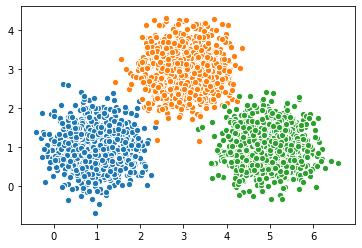

In [37]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
plotClustering(X, labels)

### a) n_init parameter

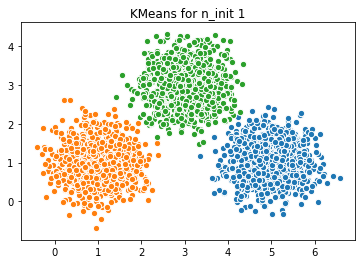

Silhouette Coefficient: 0.6728291387023632
Davies-Bouldin: 0.17169227614919494
Dunn Index: 0.001716766508885498


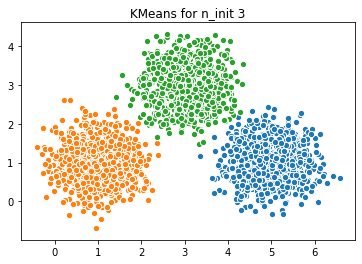

Silhouette Coefficient: 0.6728291387023632
Davies-Bouldin: 0.17169227614919494
Dunn Index: 0.001716766508885498


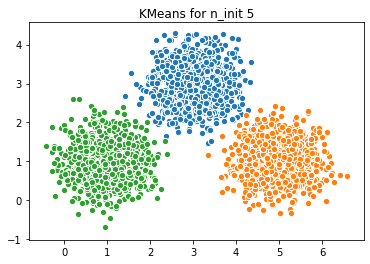

Silhouette Coefficient: 0.6728291387023632
Davies-Bouldin: 0.17169227614919494
Dunn Index: 0.001716766508885498


In [66]:
# n_init - runs fitting n times and gets the best result
N_INITS = [1, 3, 5]
for n_init in N_INITS:
    kmeans = KMeans(n_clusters=3, n_init=n_init).fit(X)
    plotClustering(X, kmeans.labels_, f'KMeans for n_init {n_init}')
    evaluate_scores(X, kmeans.labels_, kmeans.cluster_centers_)

### b) threshold parameter

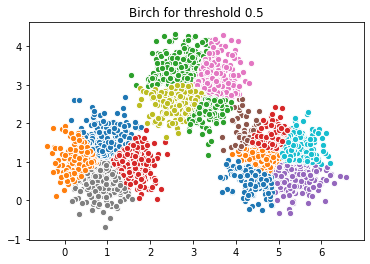

Silhouette Coefficient: 0.3078558890147347
Davies-Bouldin: 0.7786363428918968
Dunn Index: 0.00016976621799631305


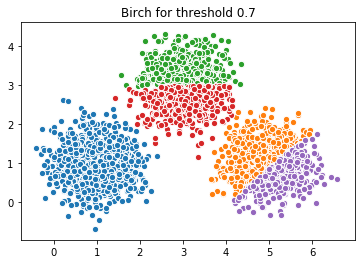

Silhouette Coefficient: 0.4262269120160298
Davies-Bouldin: 1.2052258429200964
Dunn Index: 2.8568858689423984e-05


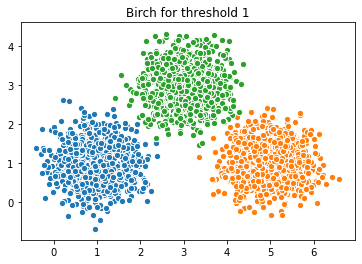

Silhouette Coefficient: 0.6728291387023632
Davies-Bouldin: 0.1717136173741546
Dunn Index: 0.001716766508885498


In [67]:
# threshold - radius of cluster obtained after merging with new point should be < threshold
THRESHOLDS = [0.5, 0.7, 1]
for threshold in THRESHOLDS:
    birch = Birch(threshold=threshold, n_clusters=None).fit(X)
    plotClustering(X, birch.labels_, title=f'Birch for threshold {threshold}')
    evaluate_scores(X, birch.labels_, birch.subcluster_centers_)

### c) eps parameter

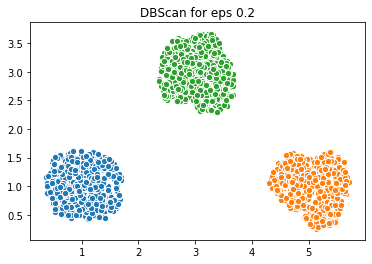

Silhouette Coefficient: 0.7919974350124748
Davies-Bouldin: 0.06181714112039624
Dunn Index: 0.9252455584752982


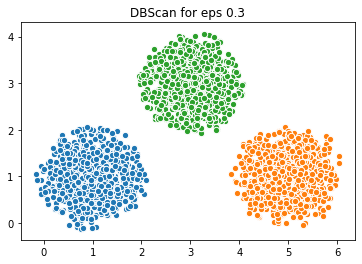

Silhouette Coefficient: 0.7063386609551492
Davies-Bouldin: 0.12700926013808914
Dunn Index: 0.08353751130365931


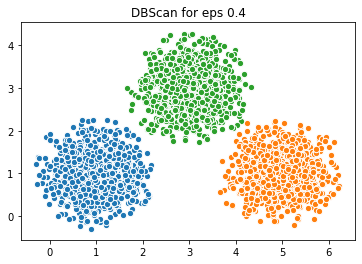

Silhouette Coefficient: 0.6807160332059042
Davies-Bouldin: 0.15856377104874966
Dunn Index: 0.0023616844467375794


In [90]:
# eps - max distance between points to be considered neighbours
EPS = [0.2, 0.3, 0.4]
for eps in EPS:
    db = DBSCAN(eps=eps, min_samples=50).fit(X)
    k = np.unique(db.labels_[db.labels_ >= 0]).size
    
    centers = np.array([np.sum(X[db.labels_ == i], axis=0) / np.count_nonzero(db.labels_ == i)
                       for i in range(k)])
    plotClustering(X, db.labels_, title=f'DBScan for eps {eps}')
    evaluate_scores(X[db.labels_ >= 0], db.labels_[db.labels_ >= 0], centers)

### d) show unclassified in DBScan

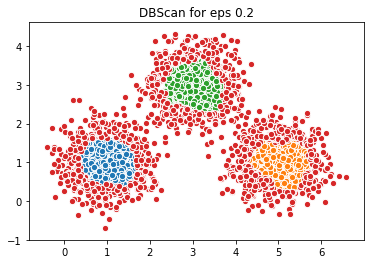

Silhouette Coefficient: 0.7919974350124748
Davies-Bouldin: 0.06181714112039624
Dunn Index: 0.9252455584752982


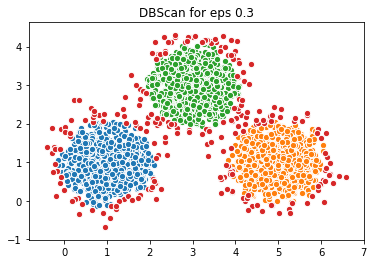

Silhouette Coefficient: 0.7063386609551492
Davies-Bouldin: 0.12700926013808914
Dunn Index: 0.08353751130365931


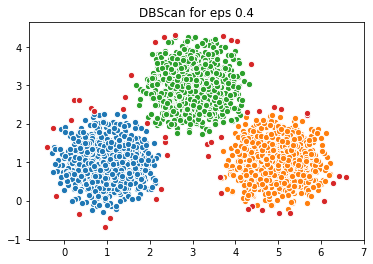

Silhouette Coefficient: 0.6807160332059042
Davies-Bouldin: 0.15856377104874966
Dunn Index: 0.0023616844467375794


In [91]:
# eps - max distance between points to be considered neighbours
EPS = [0.2, 0.3, 0.4]
for eps in EPS:
    db = DBSCAN(eps=eps, min_samples=50).fit(X)
    
    k = np.unique(db.labels_[db.labels_ >= 0]).size
    
    centers = np.array([np.sum(X[db.labels_ == i], axis=0) / np.count_nonzero(db.labels_ == i)
                       for i in range(k)])
    
    plotClustering(X, db.labels_, title=f'DBScan for eps {eps}', show_all_dbs=True)
    evaluate_scores(X[db.labels_ >= 0], db.labels_[db.labels_ >= 0], centers)

### e) pairplot for Iris dataset

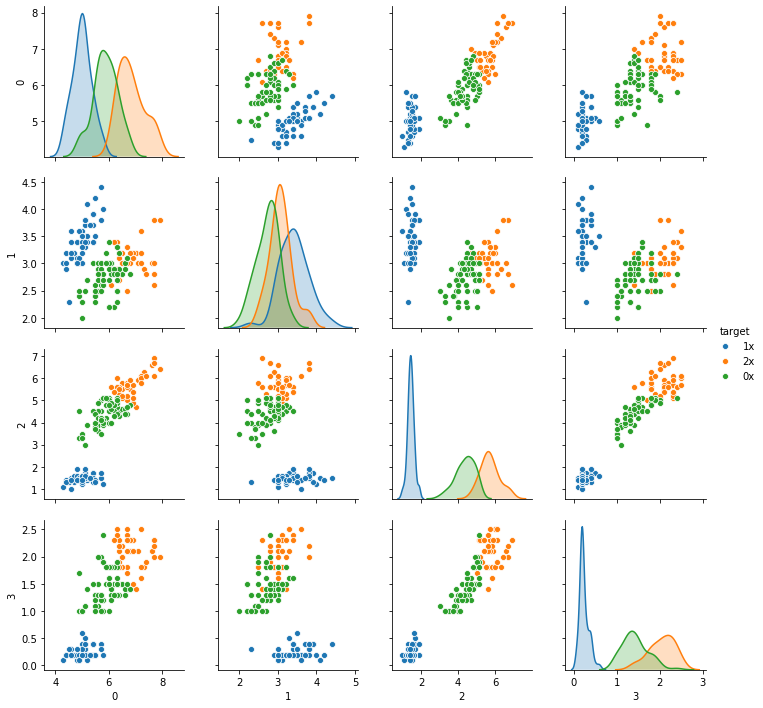

In [13]:
iris = datasets.load_iris()
X = iris.data

k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

X_df = pd.DataFrame(X)
X_df['target'] = list(map(lambda x : str(x) + 'x', k_means.labels_))
sns.pairplot(X_df, hue='target')